<a href="https://colab.research.google.com/github/mishrark0145/datamining/blob/main/Lab07_Data_Mining_FP_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Using FP-Growth Algorithm, do Market Basket Analysis on the dataset given in Lab-6.
FP-growth algorithm is an improved version of the Apriori algorithm used for Association Rule Mining from the database. The Apriori algorithms have two significant drawbacks: speed and high computational cost. To overcome these drawbacks, you can use a much faster FP-growth algorithm.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Market_Basket_Optimisation(1).txt',sep=',',header=None)
df.fillna("", inplace=True)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,


In [ ]:
items = set()
for col in df:
    unique_values = df[col].unique()
    for val in unique_values:
        if val != "":
            items.add(val)

print(items)

{'pepper', 'salt', 'yogurt cake', 'chicken', 'olive oil', 'pickles', 'frozen vegetables', 'yams', 'bramble', 'cereals', 'cooking oil', 'antioxydant juice', 'ham', 'carrots', 'mint', 'fromage blanc', 'sandwich', 'fresh bread', 'tomato sauce', 'extra dark chocolate', 'green beans', 'protein bar', 'burgers', 'green tea', 'clothes accessories', 'mushroom cream sauce', 'candy bars', 'strong cheese', 'brownies', 'salad', 'napkins', 'almonds', 'tomato juice', 'grated cheese', 'mint green tea', 'pancakes', 'bug spray', 'red wine', 'herb & pepper', 'corn', 'chutney', 'rice', 'honey', 'frozen smoothie', 'white wine', 'hot dogs', 'babies food', 'asparagus', 'chocolate', 'burger sauce', 'energy drink', 'cake', 'soup', 'meatballs', 'light mayo', 'shrimp', 'strawberries', 'light cream', 'pasta', 'vegetables mix', 'parmesan cheese', 'soda', 'whole weat flour', 'cider', 'melons', 'nonfat milk', 'spaghetti', 'muffins', 'turkey', 'magazines', 'whole wheat pasta', 'mayonnaise', 'escalope', 'oil', 'toothp

In [ ]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [ ]:
#Importing Libraries
from mlxtend.frequent_patterns import fpgrowth
#running the fpgrowth algorithm
res=fpgrowth(ohe_df,min_support=0.01, use_colnames=True)
# printing top 10
res.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.033329,(avocado)
9,0.031862,(cottage cheese)


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import time
from mlxtend.frequent_patterns import fpgrowth

# Load dataset from a text file (assuming space-separated items)
with open('/content/Market_Basket_Optimisation(1).txt', 'r') as file:
    dataset = [line.strip().split() for line in file]

# Convert dataset to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

start2 = time.time()
# Apply FP-Growth algorithm to get frequent itemsets
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
end2 = time.time()

# Print the time required for FP-Growth
print("Time required for FP-Growth:", end2 - start2)

# Display the result
print("Items:",frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Time required for FP-Growth: 0.16005444526672363
Items:      support                  itemsets
0   0.076523                     (fat)
1   0.020131                     (oil)
2   0.107052                     (tea)
3   0.085989                   (wheat)
4   0.076923                 (mineral)
5   0.072390                  (yogurt)
6   0.063058                   (fries)
7   0.019997                   (whole)
8   0.053993                  (frozen)
9   0.034929                  (french)
10  0.029729                 (cookies)
11  0.024397                   (water)
12  0.013598               (chocolate)
13  0.011998                    (dark)
14  0.021464                     (bar)
15  0.016398                     (red)
16  0.013332       (spaghetti,mineral)
17  0.011998                    (eggs)
18  0.028929                   (bread)
19  0.029063                  (ground)
20  0.014531  (beef,spaghetti,mineral)
21  0.049460                       (&)
22  0.030929                    (herb)
23  0.01

In [ ]:
# importing required module
from mlxtend.frequent_patterns import association_rules
# creating asssociation rules
res=association_rules(res, metric="lift", min_threshold=1)
# printing association rules
res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(spaghetti),(green tea),0.174110,0.132116,0.026530,0.152374,1.153335,0.003527,1.023900,0.160977
1,(green tea),(spaghetti),0.132116,0.174110,0.026530,0.200807,1.153335,0.003527,1.033405,0.153188
2,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786,0.251529
3,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436,0.240286
4,(chocolate),(green tea),0.163845,0.132116,0.023464,0.143206,1.083943,0.001817,1.012944,0.092617
...,...,...,...,...,...,...,...,...,...,...
401,(cake),(frozen vegetables),0.081056,0.095321,0.010265,0.126645,1.328618,0.002539,1.035866,0.269155
402,(pancakes),(cake),0.095054,0.081056,0.011865,0.124825,1.539983,0.004160,1.050011,0.387473
403,(cake),(pancakes),0.081056,0.095054,0.011865,0.146382,1.539983,0.004160,1.060129,0.381571
404,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,0.528512


2) Using Decision Tree classify on the following dataset https://github.com/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset.

In [ ]:
#import pandas library
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

#loading dataset
df=pd.read_csv("/content/diabetes_dataset.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#feature variables
x=df.drop(['Outcome'], axis=1)
x

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
#target variable
y=df.Outcome
y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

In [ ]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 70.77922077922078


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[81, 18],
       [27, 28]])

In [ ]:
print("Accuracy:",((82+27)/154))

Accuracy: 0.7077922077922078


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

#checking prediction value
model.predict([[6,148,72,35,0,33.6,0.627,50]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
features=x.columns
features


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


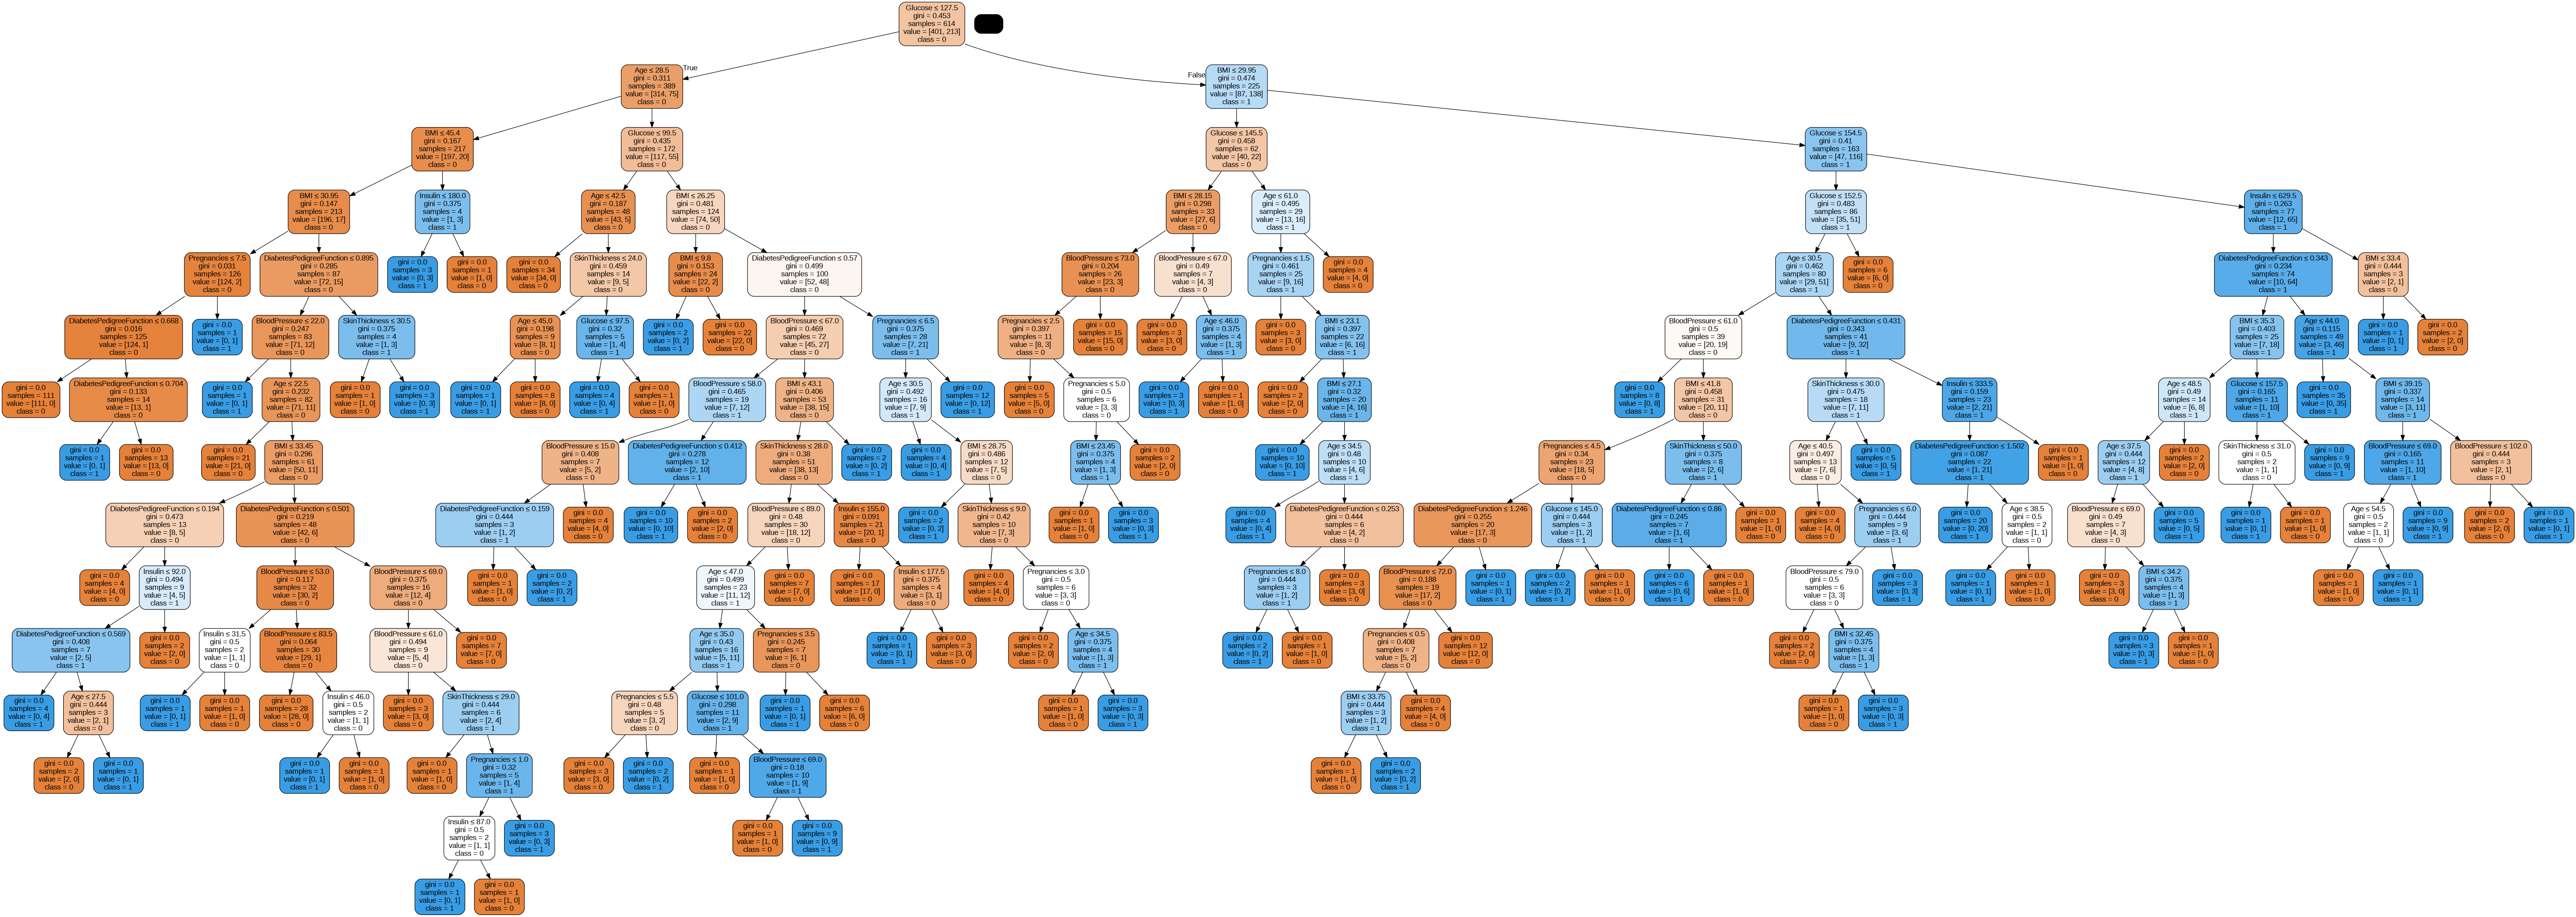

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 79.87012987012987


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


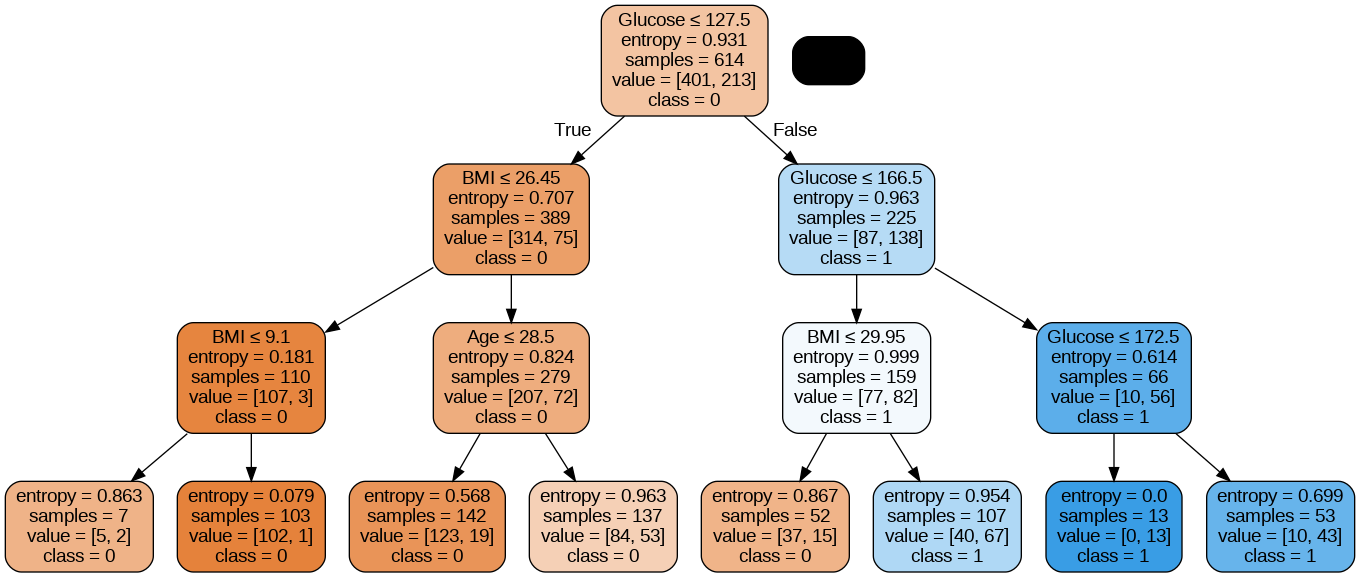

In [ ]:
#Better Decision Tree Visualisation
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())